# Project1: 당뇨병 수치 선형회귀

In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

### 1. 데이터 가져오기

In [20]:
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
print(diabetes.DESCR)
diabetes_df['Label'] = diabetes.target
diabetes_corr = diabetes_df.corr() #correlation
diabetes_corr

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Label
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


### 2. 상관계수 보고 높은 칼럼만 설정

In [6]:
cor = diabetes_corr.loc[:'s6', 'Label'].abs().sort_values(ascending=False)
#.abs().sort_values(ascending=False)
cor # 상관계수가 큰 순서대로 반환

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s3     0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: Label, dtype: float64

In [28]:
names = ['Label', 'bmi', 's5', 'bp', 's4', 's3', 's6']
diabetes_df_2 = diabetes_df.loc[:, names]
diabetes_df_2

,Label,bmi,s5,bp,s4,s3,s6
0,151.0,0.061696,0.019907,0.021872,-0.002592,-0.043401,-0.017646
1,75.0,-0.051474,-0.068332,-0.026328,-0.039493,0.074412,-0.092204
2,141.0,0.044451,0.002861,-0.005670,-0.002592,-0.032356,-0.025930
3,206.0,-0.011595,0.022688,-0.036656,0.034309,-0.036038,-0.009362
4,135.0,-0.036385,-0.031988,0.021872,-0.002592,0.008142,-0.046641
...,...,...,...,...,...,...,...
437,178.0,0.019662,0.031193,0.059744,-0.002592,-0.028674,0.007207
438,104.0,-0.015906,-0.018114,-0.067642,0.034309,-0.028674,0.044485
439,132.0,-0.015906,-0.046883,0.017293,-0.011080,-0.024993,0.015491
440,220.0,0.039062,0.044529,0.001215,0.026560,-0.028674,-0.025930


### 3. 모델에 입력할 데이터 X, Y 준비하기 (numpy array로 변환해서 저장) _ 정규화하기

In [86]:
X = diabetes_df.loc[:, ['bmi', 's5', 'bp', 's4', 's3', 's6']]
Y = diabetes_df.loc[:, 'Label']
df_X = np.array(X)
df_Y = np.array(Y)
print(type(df_X), type(df_Y))

scaler = MinMaxScaler()
scaler.fit(df_X)
df_X = scaler.transform(df_X)
df_Y = np.reshape(df_Y, (-1,1))
scaler.fit(df_Y)
df_Y = scaler.transform(df_Y)
df_Y = np.reshape(df_Y, (-1))
print(df_Y.shape)

x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2)
print('학습 데이터 shape:', x_train.shape, y_train.shape)
print('검증 데이터 shape:', x_test.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(442,)
학습 데이터 shape: (353, 6) (353,)
검증 데이터 shape: (89, 6) (89,)


### 4. 모델 준비하기 / 손실함수 정의 / 모델 학습하기

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
mse_loss = mean_squared_error(y_test, prediction)

print('Loss:', np.round(mse_loss,4))
print('TrainSet Score:', model.score(x_train, y_train))
print('TestSet Score:', model.score(x_test, y_test))
result = pd.DataFrame({'Real': y_test, 'Predict': prediction})
result

Loss: 0.0244
TrainSet Score: 0.45673658043882204
TestSet Score: 0.6131808542486787


,Real,Predict
0,0.224299,0.280235
1,0.725857,0.593606
2,0.772586,0.730670
3,0.361371,0.427233
4,0.127726,0.326782
...,...,...
84,0.295950,0.449591
85,0.196262,0.330156
86,0.146417,0.135501
87,0.660436,0.443194


### 5. 정답 데이터와 예측 데이터 시각화하기
#### df_X에 들어 있는 칼럼 ['bmi', 's5', 'bp', 's4', 's3', 's6']

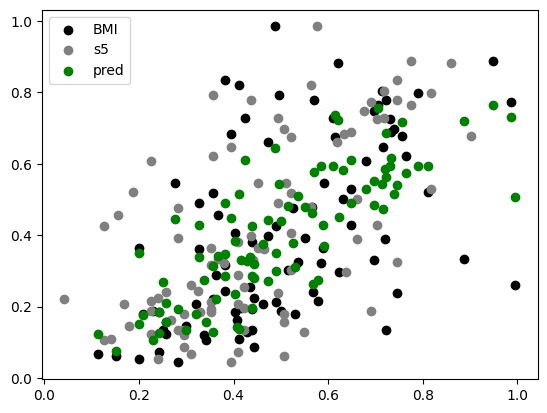

In [89]:
# BMI 칼럼과 s5 칼럼을 시각화해보기
plt.scatter(x_test[:,1], y_test, color='black', label="BMI")
plt.scatter(x_test[:,2], y_test, color='grey', label='s5')
plt.scatter(x_test[:,1], prediction, color='green', label="pred")
plt.legend()
plt.show()

# 당뇨병 수치 선형회귀 (Pytorch)

In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [115]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(df_X, df_Y, test_size=0.2)
x_train_torch = torch.tensor(x_train_p, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_p, dtype=torch.float32)
print(type(x_train_torch), type(y_train_torch))
print(x_train_torch.shape, y_train_torch.shape)

x_test_torch = torch.tensor(x_test_p, dtype=torch.float32)
y_test_torch = torch.tensor(y_test_p, dtype=torch.float32)
print(type(x_test_torch), type(y_test_torch))
print(x_test_torch.shape, y_test_torch.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([353, 6]) torch.Size([353])
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([89, 6]) torch.Size([89])


In [116]:
model = nn.Linear(in_features=6, out_features=1, bias=True)
# 입력 피처 6 출력 피처 1
criterion = nn.MSELoss()
optimizer = optim.SGD(params=model.parameters(), lr=1e-4)
# learning rate를 0.001

train_losses = []
test_losses = []
prediction_list = []
n_epochs = 22000

for step in range(n_epochs+1):
    optimizer.zero_grad()
    prediction = model(x_train_torch)
    prediction_list = []
    for i in prediction:
        prediction_list.append(i.detach().numpy())
    loss = criterion(prediction, y_train_torch)

    loss.backward()
    optimizer.step()
    
    output_test = model(x_test_torch)
    output_list = []
    for j in output_test:
        output_list.append(j.detach().numpy())
    loss_test = criterion(output_test, y_test_torch)

    if step%1000==0:
        train_losses.append(loss.item())
        test_losses.append (loss_test.item())
        print('epoch:', step, ' Training cost:', np.round(loss.item(),4), ' Test cost: ', np.round(loss_test.item(),4))   

print("training End")     

c:\Users\Jennie\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([353])) that is different to the input size (torch.Size([353, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Jennie\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([89])) that is different to the input size (torch.Size([89, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0  Training cost: 0.5369  Test cost:  0.4929
epoch: 1000  Training cost: 0.2733  Test cost:  0.2423
epoch: 2000  Training cost: 0.1584  Test cost:  0.1349
epoch: 3000  Training cost: 0.1083  Test cost:  0.0892
epoch: 4000  Training cost: 0.0864  Test cost:  0.07
epoch: 5000  Training cost: 0.0768  Test cost:  0.0621
epoch: 6000  Training cost: 0.0725  Test cost:  0.0589
epoch: 7000  Training cost: 0.0706  Test cost:  0.0577
epoch: 8000  Training cost: 0.0696  Test cost:  0.0573
epoch: 9000  Training cost: 0.0692  Test cost:  0.0571
epoch: 10000  Training cost: 0.0689  Test cost:  0.0571
epoch: 11000  Training cost: 0.0687  Test cost:  0.057
epoch: 12000  Training cost: 0.0686  Test cost:  0.057
epoch: 13000  Training cost: 0.0684  Test cost:  0.0569
epoch: 14000  Training cost: 0.0683  Test cost:  0.0569
epoch: 15000  Training cost: 0.0682  Test cost:  0.0568
epoch: 16000  Training cost: 0.0681  Test cost:  0.0567
epoch: 17000  Training cost: 0.068  Test cost:  0.0566
epoch: 180

torch.Size([89])


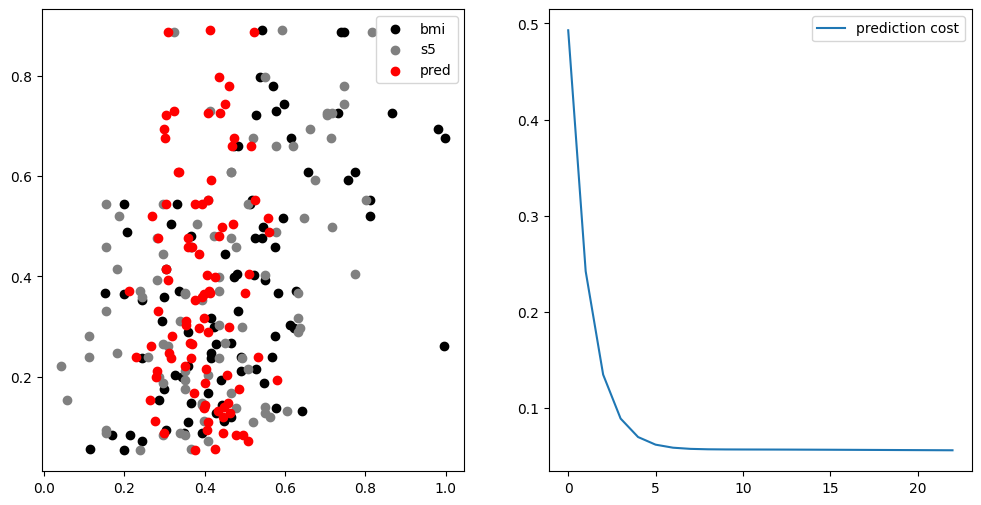

In [117]:
prediction = torch.tensor(output_list)
prediction = prediction.reshape(-1)
print(prediction.shape)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_test_torch[:,1], y_test_torch, color='black', label="bmi")
plt.scatter(x_test_torch[:,2], y_test_torch, color='grey', label='s5')
plt.scatter(prediction, y_test_torch, color='red', label="pred")
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.plot(test_losses, label='prediction cost')
plt.legend(loc='upper right')
plt.show()